<a href="https://www.kaggle.com/code/emirhaangulerr/a-large-scale-fish-dataset?scriptVersionId=202918098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install --user imutils

  Preparing metadata (setup.py) ... - \ done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=733d12fbec109109debe1282f8bd50cc37ba608eb0d4760caf7e6ceec8d1a8cd
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
#GEREKLİ KÜTÜPHANELERİ İMPORT EDİYORUZ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2, urllib, itertools
import os, random, glob
from imutils import paths
from sklearn.utils import shuffle
from urllib.request import urlopen

In [3]:
#GEREKLİ KÜTÜPHANELERİ İMPORT EDİYORUZ

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2,DenseNet201,inception_v3
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.metrics import classification_report, accuracy_score, f1_score,precision_score, confusion_matrix, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

In [4]:
#KAGGLE'DAKİ VERİ DOSYASININ YOLUNU KAYDEDİYORUZ 
dir_path = r'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

## VERİYİ TANIMA VE ANALİZ ETME

In [5]:
#BALIKLARIN CİNSLERİNİ CLASSES DEĞİŞKENİNE ATIYORUZ
classes = [i for i in os.listdir(dir_path) if '.' not in i]                    
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [6]:
#BALIKLARIN RESİMLERİNİN YER ALDIĞI KLASÖRLERDE GT KLASÖRLÜRÜNÜ KULLANMIYORUZ
all_path=[] 
for img_path in os.listdir(dir_path): 
    if img_path in classes :
        all_data=glob.glob(pathname=dir_path+'/'+img_path+'/'+img_path+'/*.*')
        all_path.extend(all_data)
    else:
        continue

In [7]:
all_path[8999]

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/00291.png'

In [8]:
target_size = (224,224)
fish_labels = { 0:"Black Sea Sprat", 1:"Gilt-Head Bream", 2:"Hourse Mackerel", 
                3:"Red Mullet", 4:"Red Sea Bream", 5:"Sea Bass", 6:"Shrimp", 
                7:"Striped Red Mullet", 8:"Trout"}

In [9]:
#DATAFRAMEDE FİLEPATH SÜTÜNUNA FOTOĞRAFLARININ YOLLARINI LABEL SÜTUNUNA BALIKLARIN CİNSLERİNİ YANİ ETİKETLERİ ATIYORUZ
df=pd.DataFrame({'Filepath':all_path})
df['Label']=df['Filepath'].apply(lambda x :x.split('/')[-2])
pd.options.display.max_colwidth = 100

df = df.sample(frac=1).reset_index(drop = True)

In [10]:
df.describe

<bound method NDFrame.describe of                                                                                                  Filepath  \
0              /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00113.png   
1     /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/0...   
2          /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass/00584.png   
3              /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00621.png   
4     /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Spr...   
...                                                                                                   ...   
8995  /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Spr...   
8996             /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Trout/Trou

In [11]:
df.head()

,Filepath,Label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00113.png,Shrimp
1,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/0...,Red Sea Bream
2,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass/00584.png,Sea Bass
3,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00621.png,Shrimp
4,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Spr...,Black Sea Sprat


In [12]:
df.tail()

,Filepath,Label
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Spr...,Black Sea Sprat
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Trout/Trout/00584.png,Trout
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00799.png,Shrimp
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Spr...,Black Sea Sprat
8999,/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Macker...,Hourse Mackerel


## VERİ GÖRSELLEŞTİRME 

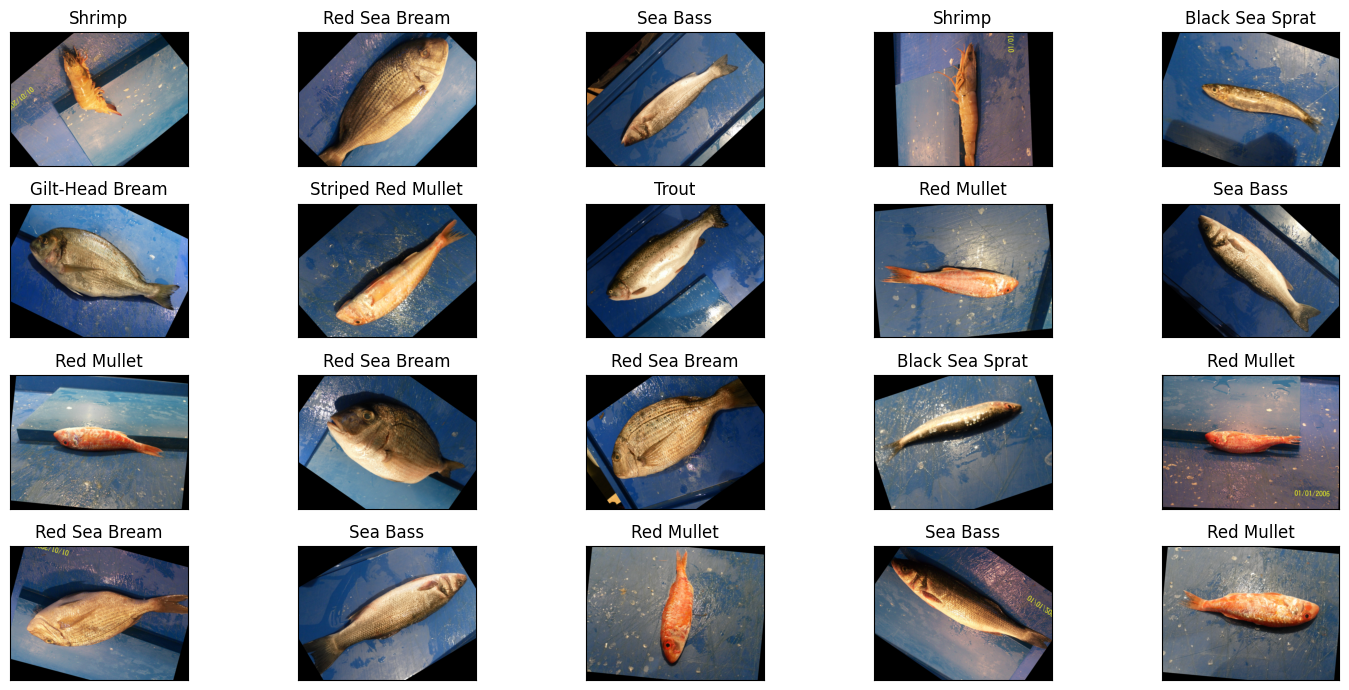

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i])
plt.tight_layout()
plt.show()        

## VERİYİ EĞİTME 

In [14]:
#DATAFRAME'DEKİ VERİLERİ TRAİN VE TEST OLARAK AYIRMA
train_df,test_df=train_test_split(df,test_size=0.3,shuffle=True,random_state=34)

In [15]:
print('The dimension of training data :',train_df.shape)
print('The dimension of testing data :',test_df.shape)


The dimension of training data : (6300, 2)
The dimension of testing data : (2700, 2)


In [16]:
# ImageDataGenerator İLE FOTOĞRAFLARI FARKLI ŞEKİLLERDE İNCELEYEREK TEST SKORUMUZU YÜKSELTME ADIMLARI
training_generator=ImageDataGenerator(tf.keras.applications.densenet.preprocess_input,
                                      validation_split=0.2, 
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_generator=ImageDataGenerator(tf.keras.applications.inception_v3.preprocess_input,
                                      validation_split=0.2)




In [17]:
testing_generator=ImageDataGenerator(tf.keras.applications.densenet.preprocess_input)

testing_generator=ImageDataGenerator(tf.keras.applications.inception_v3.preprocess_input)

In [18]:
training_images=training_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=target_size,    
    color_mode='rgb',
    batch_size=224,
    shuffle=True,
    seed=42,
    subset='training')


validation_images=training_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=target_size,
    color_mode='rgb',
    batch_size=224,
    shuffle=True,
    seed=42,
    subset='validation')


testing_images=testing_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=target_size,
    color_mode='rgb',
    batch_size=224,
    shuffle=False,)

Found 5040 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.


## OVERFITINGI ONLEME

In [19]:
## OVERFITTINGIN ÖNÜNE GEÇME ADIMLARI
early_stopping=EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=0,factor=0.1)

model_check_point=ModelCheckpoint(monitor='val_accuracy',filepath='mymodel.keras',save_best_only=True,verbose=True)


## MODELLEME

In [20]:
# ANN MODELİNİ TASARLAMA
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='gelu')(x)

x = Dropout(0.25)(x)

x = Dense(128, activation='gelu')(x)

x = Dropout(0.25)(x)

x = Dense(64, activation='gelu')(x)

x = Dropout(0.25)(x)

x = Dense(9, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# MODELİ EĞİTME
history=model.fit(
    training_images,
    validation_data=validation_images,
    epochs=30,
    batch_size=224,
    callbacks=[early_stopping,reduce_lr,model_check_point])

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729718146.033935      85 service.cc:145] XLA service 0x7c81140dcc60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729718146.033999      85 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1729718209.808193      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1234 - loss: 3.4505
Epoch 1: val_accuracy improved from -inf to 0.22222, saving model to mymodel.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 291s 8s/step - accuracy: 0.1239 - loss: 3.4294 - val_accuracy: 0.2222 - val_loss: 2.0763 - learning_rate: 1.0000e-04
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2025 - loss: 2.2633
Epoch 2: val_accuracy improved from 0.22222 to 0.40873, saving model to mymodel.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.2032 - loss: 2.2600 - val_accuracy: 0.4087 - val_loss: 1.9167 - learning_rate: 1.0000e-04
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2657 - loss: 2.0072
Epoch 3: val_accuracy improved from 0.40873 to 0.53730, saving model to mymodel.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.2666 - loss: 2.0054 - val_accuracy: 0.5373 - val_loss: 1.6789 - learning_rate: 1.0000e-04
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3617 - loss: 1

## EVALUATİON VE TEST AŞAMASI

In [23]:
def model_testing(path):
    img = load_img(path, target_size = target_size)
    img = img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
    p = model.predict(img.reshape(1,224,224,3))
    predicted_class = np.argmax(p[0])
    
    return img, p, predicted_class

In [24]:
#SEÇTİĞİMZ#VERİLERİ DÜZENLEMİŞ OLDUĞUMUZ model_testing FONKSİYONU İLE TEST ETME AŞAMALARI
img1,p1,predicted_class1 = model_testing('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00481.png',)
img2,p2,predicted_class2 = model_testing('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00929.png')
img3,p3,predicted_class3 = model_testing('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/00291.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [25]:
Max_prob1 = str(np.max(p1))
Max_prob2 = str(np.max(p2))
Max_prob3 = str(np.max(p3))

In [26]:
fishes = { 0:"Black Sea Sprat", 1:"Gilt-Head Bream", 2:"Hourse Mackerel", 
                3:"Red Mullet", 4:"Red Sea Bream", 5:"Sea Bass", 6:"Shrimp", 
                7:"Striped Red Mullet", 8:"Trout"}

In [27]:
print(Max_prob1, predicted_class1)
print(Max_prob2, predicted_class2)
print(Max_prob3, predicted_class3)

0.27447352 1
0.23406808 1
0.24783711 0


In [28]:
from keras.models import load_model

model=load_model('/kaggle/working/mymodel.keras')

In [29]:
#MODELİMİN DOĞRULUĞUNU KIYASLAYABİLECEĞİMİZ ACCURACY VE LOSS VERİLERİNİ HESAPLAMA ADIMI
Evaluation=model.evaluate(training_images)


print("Test Accuracy: {:.2f}%".format(Evaluation[1] * 100))
print("Test Loss: {:.5f}".format(Evaluation[0]))

23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.9797 - loss: 0.1049
Test Accuracy: 97.88%
Test Loss: 0.10513


In [30]:
# BİR DİĞER TAHMİN AŞAMASI
prediction=model.predict(testing_images)
prediction=np.argmax(prediction,axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 87s 6s/step


I0000 00:00:1729720975.279468      82 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



In [31]:
labels = (training_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
prediction = [labels[k] for k in prediction]

In [32]:
print(prediction[100])

Sea Bass
